In [1]:
cd ../../task_01/pipelines

/Users/pldelacour/Documents/PL_Ecole/data_sc_lab/data_sc_lab/task_01/pipelines


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection
from  sklearn.metrics import mean_squared_error

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,11

In [4]:
'''
 
disease = df_beha['DX_01'].unique()
for i in df_beha['DX_01']: 
    print(i)
"Gen" in disease[0]
for i in disease :
    if(isinstance(i, str) ): 
        if("Aut" in i):
            print(i)

"Autism Spectrum Disorder"
'''

'\n \ndisease = df_beha[\'DX_01\'].unique()\nfor i in df_beha[\'DX_01\']: \n    print(i)\n"Gen" in disease[0]\nfor i in disease :\n    if(isinstance(i, str) ): \n        if("Aut" in i):\n            print(i)\n\n"Autism Spectrum Disorder"\n'

In [5]:
disease = df_beha['DX_01'].unique()
y_labels = df_beha[["Patient_ID", "Age", "DX_01"]]
aut_bin = (df_beha['DX_01'].str.contains("Autism Spectrum Disorder") == True)*1.0
df_beha['autism'] = aut_bin

In [6]:
np.sum(df_beha['DX_01'].str.contains('nan') == True)

0

In [7]:
#for i in disease :
#    print(i)

In [8]:
aut = np.count_nonzero(df_beha.autism)
not_aut = len(df_beha.autism) - aut
print("# autism = " , aut)
print("# of non autism =" , not_aut)

# autism =  164
# of non autism = 1932


In [9]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "autism"]]
#y_labels_healthy = y_labels[y_labels["DX_01"].str.contains("Autism Spectrum Disorder") == True]

#y_labels = y_labels[["Patient_ID", "Age"]]
#y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
#y_labels_healthy
y_labels

,Patient_ID,Age,autism
0,NDARYM832PX3,7.048254,0.0
1,NDARNJ687DMC,6.348163,0.0
2,NDARRM363BXZ,10.052589,0.0
3,NDARUW586LLL,12.319415,0.0
4,NDARDC298NW4,13.901437,0.0
...,...,...,...
2091,NDARYZ986HEW,7.563084,0.0
2092,NDARPM572ZZV,9.832762,0.0
2093,NDARYA955CY1,15.357859,0.0
2094,NDARRT283RHB,10.712069,0.0


In [10]:
cd ../age_residuals/images

/Users/pldelacour/Documents/PL_Ecole/data_sc_lab/data_sc_lab/task_01/age_residuals/images


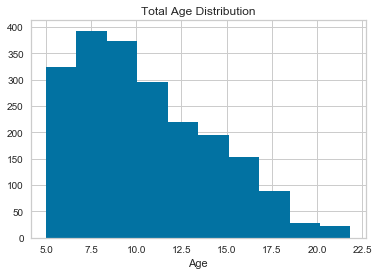

In [11]:
plt.hist(y_labels.Age , facecolor='b')
#fig, ax = plt.subplots(constrained_layout=True)
plt.title('Total Age Distribution')
plt.xlabel('Age')
plt.savefig('total_age_distrib.png')
plt.show()

In [12]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)
print("Original lengths: " + str(len(df_psd_cluster)) + "(psd), " + \
     str(len(df_spectro_cluster)) + "(spectro), " + str(len(df_microstate)) + "(micro)")

# Aggregate with label
df_label_psd_cluster = pd.merge(y_labels, df_psd_cluster, on='Patient_ID')
df_label_spectro_cluster = pd.merge(y_labels, df_spectro_cluster, on='Patient_ID')
df_label_microstate = pd.merge(y_labels, df_microstate, on='Patient_ID')
print("All people, resulting lengths: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

# Drop NaN values
df_label_psd_cluster = fill_with_median(df_label_psd_cluster)
df_label_spectro_cluster = fill_with_median(df_label_spectro_cluster)
df_label_microstate = fill_with_median(df_label_microstate)
print("Replace NaN by median, resulting lenghts: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

Original lengths: 1485(psd), 1485(spectro), 1108(micro)
All people, resulting lengths: 1306(psd), 1306(spectro), 974(micro)
Replace NaN by median, resulting lenghts: 1306(psd), 1306(spectro), 974(micro)


In [13]:
df_label_spectro_cluster

,Patient_ID,Age,autism,eyesclosed_fband_delta_absmean_lfront,eyesclosed_fband_delta_absmean_mfront,eyesclosed_fband_delta_absmean_rfront,eyesclosed_fband_delta_absmean_lpari,eyesclosed_fband_delta_absmean_mpari,eyesclosed_fband_delta_absmean_rpari,eyesclosed_fband_delta_relmean_lfront,...,eyesopen_fooof_peak_freq_rfront,eyesopen_fooof_peak_freq_lpari,eyesopen_fooof_peak_freq_mpari,eyesopen_fooof_peak_freq_rpari,eyesopen_fooof_peak_amplitude_lfront,eyesopen_fooof_peak_amplitude_mfront,eyesopen_fooof_peak_amplitude_rfront,eyesopen_fooof_peak_amplitude_lpari,eyesopen_fooof_peak_amplitude_mpari,eyesopen_fooof_peak_amplitude_rpari
0,NDARFM080VAF,7.623203,0.0,7.519803,7.043891,6.528158,9.633529,9.989483,9.305804,9.598653,...,9.485781,9.441022,9.384172,9.425798,0.795549,0.876262,0.872379,0.989101,1.099981,0.915441
1,NDARVG148WHV,10.835158,0.0,2.346685,3.945786,2.962716,3.440606,3.565384,3.023286,10.968235,...,8.800915,8.510134,9.078390,14.741810,0.254701,0.351010,0.303875,0.234960,0.232564,0.344537
2,NDARUY876VL1,7.987451,0.0,1.281869,1.229748,1.905450,1.768091,1.484286,0.756394,13.132905,...,5.604535,5.602136,4.096616,5.084040,0.048655,0.233294,0.282735,0.256238,0.175123,0.304286
3,NDARYU323ZDJ,8.096851,0.0,3.109075,4.803264,2.873502,2.644382,3.884837,2.391569,9.931212,...,9.288451,6.651558,6.396867,10.291086,0.218827,0.313734,0.298905,0.178899,0.108880,0.449437
4,NDARYP516VUU,10.758156,0.0,3.736577,5.970049,3.462826,4.225793,6.973617,6.719936,5.615468,...,10.750797,10.401234,10.783732,11.046665,0.821805,0.784304,0.770845,0.914380,0.671399,1.004923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,NDARYM334BZ5,16.119438,0.0,3.743134,3.795633,3.286381,2.779438,3.539956,3.800533,8.565498,...,10.376962,10.707490,10.383040,10.343315,0.623514,0.582917,0.422394,0.615360,0.860283,0.945789
1302,NDARJJ817UP1,9.126397,0.0,5.029233,8.495798,8.156703,9.869929,10.167374,7.998537,12.309035,...,6.861198,8.796750,8.560897,8.794146,0.454742,0.134101,0.141704,0.403562,0.274933,0.342562
1303,NDARYZ986HEW,7.563084,0.0,2.830657,5.259391,6.724664,4.745513,5.885628,3.160138,13.388712,...,9.482208,7.101976,9.409898,9.301044,0.185029,0.165101,0.246363,0.120704,0.254212,0.271848
1304,NDARPM572ZZV,9.832762,0.0,3.465377,4.039687,2.988368,5.326977,6.712658,6.641600,9.232106,...,10.532135,10.375732,10.918782,10.700086,0.744570,0.505359,0.621831,0.722997,0.781605,0.793120


In [14]:
len(df_label_spectro_cluster.columns)

303

In [15]:
col = df_label_spectro_cluster.columns
X = df_label_spectro_cluster.loc[ : , (col != 'autism')&(col != 'Patient_ID')]
y = df_label_spectro_cluster.loc[:, col == 'autism']

colname_X = X.columns
colname_y = y.columns
X = np.array(X)
y = np.array(y)

In [16]:
print(np.sum(y==1))

113


## PCA of Autism 

In [18]:
from sklearn.decomposition import PCA

explained variance ratio (first two components): [0.50923087 0.14820457]


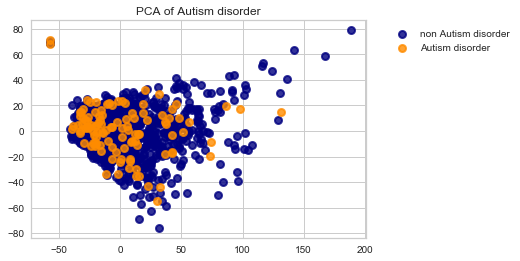

In [20]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#print(X_r)
#print(X_r.shape)

target_names = ['non Autism disorder' , 'Autism disorder']

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ##
    #print(color, i , target_name)
    #X_r[y == i, 0]
    ##
    plt.scatter(X_r[(y==i).flatten(), 0], X_r[(y==i).flatten(), 1], color=color, alpha=.8, lw=lw,
                label=target_name)
#plt.legend( loc='best', shadow=False, scatterpoints=1)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Autism disorder')


plt.show
plt.savefig('Autism_normal_.png')

## Remove the effect of the age

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
col = df_label_spectro_cluster.columns
X = df_label_spectro_cluster.loc[ : , (col != 'autism')&(col != 'Patient_ID')&(col != "Age")]
y = df_label_spectro_cluster.loc[:, col == 'autism']
age = df_label_spectro_cluster.loc[ : , col == 'Age']

In [35]:
X_remove_age = np.ones(X.shape)
for i in range(len(X.columns)) : 
    fi = np.array(X.loc[:,X.columns[i]]).reshape(-1,1)
    reg = LinearRegression().fit(age,fi)
    X_remove_age[:,i] = fi.reshape(1,-1) -reg.predict(age).reshape(1,-1)
X_remove_age = pd.DataFrame(X_remove_age , columns=X.columns)


In [36]:
## Plot PCA 

In [37]:
X_remove_age = np.array(X_remove_age)
y = np.array(y)

explained variance ratio (first two components): [0.54423656 0.13186824]


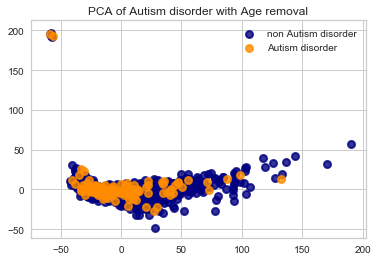

In [43]:
pca = PCA(n_components=2)
X_r = pca.fit(X_remove_age).transform(X_remove_age)

#print(X_r)
#print(X_r.shape)

target_names = ['non Autism disorder' , 'Autism disorder']

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ##
    #print(color, i , target_name)
    #X_r[y == i, 0]
    ##
    plt.scatter(X_r[(y==i).flatten(), 0], X_r[(y==i).flatten(), 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Autism disorder with Age removal')

plt.savefig('Autism_with_age_removal_.png')
